In [1]:
import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Synthetic data generation

In [3]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [4]:
import pandas as pd

## Load transactions

In [5]:
data = pd.read_csv('data/james.csv')
data.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


## Prepare dataset

In [6]:
data = data.dropna()

In [7]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
data, test = train_test_split(data, test_size=0.2, random_state=42)

## Train model and synthesized data

In [10]:
from synthesized.core import BasicSynthesizer

/Users/koziuk/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3138-2D31-322D-B531
Expires at: 2018-12-31 00:00:00


In [11]:
with BasicSynthesizer(data=data) as synthesizer:
    synthesizer.learn(data=data, verbose=5000)
    synthesized = synthesizer.synthesize(n=10000)

value types:
Unnamed: 0 continuous-integer
SeriousDlqin2yrs categorical
RevolvingUtilizationOfUnsecuredLines continuous
age categorical-similarity
NumberOfTime30-59DaysPastDueNotWorse categorical-similarity
DebtRatio continuous
MonthlyIncome continuous
NumberOfOpenCreditLinesAndLoans categorical-similarity
NumberOfTimes90DaysLate categorical-similarity
NumberRealEstateLoansOrLines categorical-similarity
NumberOfTime60-89DaysPastDueNotWorse categorical-similarity
NumberOfDependents categorical-similarity
5000: 6.54e+07
10000: 1.39e+08
15000: 5.73e+07
20000: 1.34e+07
25000: 4.54e+06
30000: 1.34e+06
35000: 9.61e+04
40000: 1.73e+05
45000: 6.48e+09
50000: 5.31e+07


## Display synthesized data

In [12]:
synthesized.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,78,0,0.153416,40,0,20.408154,5102.949219,7,0,0,0,0.0
1,63,0,-0.014226,47,0,-2.766595,6288.951172,12,0,2,0,0.0
2,142,0,-0.128654,50,0,0.375609,18280.949219,26,0,4,0,0.0
3,168,0,-0.056010,50,0,-7.245952,25421.164062,1,0,1,0,1.0
4,68,0,-0.529842,50,0,-7.283205,6722.098145,3,0,1,0,0.0


In [13]:
data.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35298,35299,0,0.133608,56,0,0.151236,54166.0,20,0,3,0,3.0
110943,110944,0,0.268997,27,0,0.051128,3500.0,4,0,0,0,0.0
44650,44651,1,0.950586,41,2,0.321115,11266.0,6,1,1,0,0.0
97475,97476,0,0.362873,56,0,0.426120,8100.0,8,0,2,0,1.0
27331,27332,0,1.015698,39,1,0.241451,3362.0,3,0,0,0,2.0


In [14]:
data = data.astype(synthesized.dtypes)

In [15]:
test = data.astype(synthesized.dtypes)

# Visualization of original and synthetic data

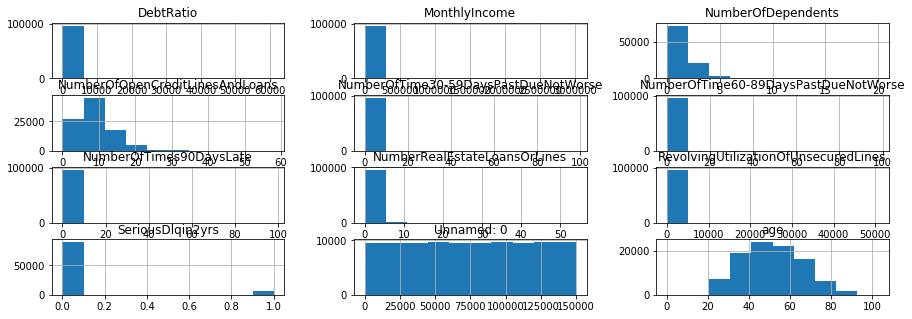

In [16]:
data.hist(figsize=(15,5))
None

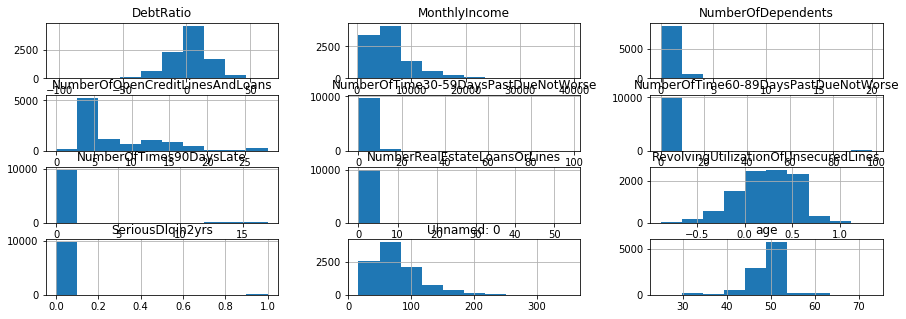

In [17]:
synthesized.hist(figsize=(15,5))
None

# Tests to confirm the utility of synthetic data 

In [18]:
from synthesized.testing import UtilityTesting, ColumnType
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [19]:
testing = UtilityTesting(synthesizer, data, test, synthesized)

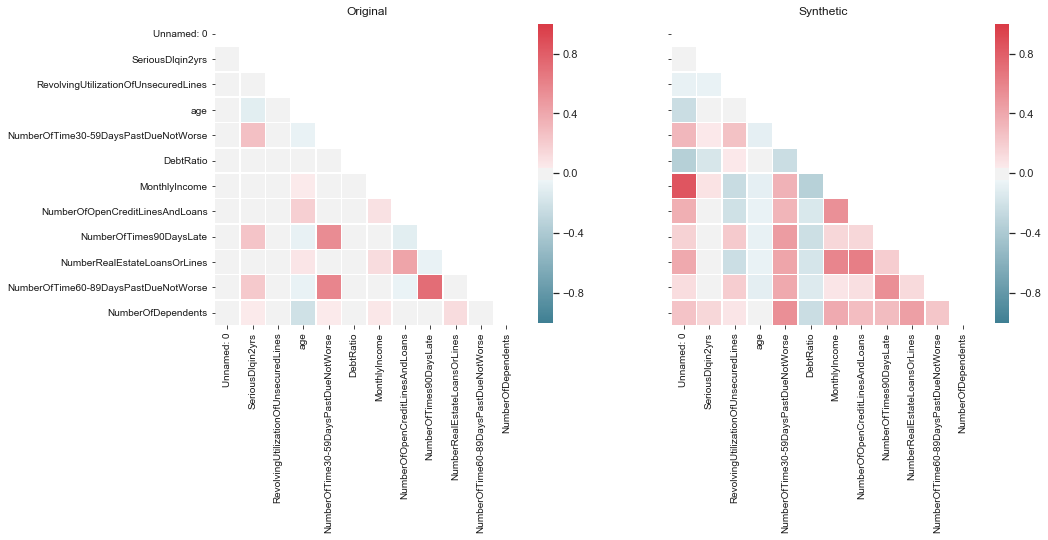

In [20]:
testing.show_corr_matrices()

In [21]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

,target_column,estimator,dummy_original_score,original_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,DebtRatio,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000042,453.803532,0.0,9.278397e-08
1,DebtRatio (categorical reduction),DecisionTreeClassifier,9.996051e-01,1.000000,0.483199,0.000000,0.504308,0.0,0.000000e+00
2,MonthlyIncome,DecisionTreeRegressor,2.611594e-08,1.000000,0.000000,0.000000,22842.912384,0.0,0.000000e+00
3,MonthlyIncome (categorical reduction),DecisionTreeClassifier,9.998441e-01,1.000000,0.999844,0.000000,0.000156,0.0,0.000000e+00
4,NumberOfDependents,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,1.541432,0.0,0.000000e+00
5,NumberOfDependents (categorical reduction),DecisionTreeClassifier,7.459024e-01,1.000000,0.607691,0.000000,0.379078,0.0,0.000000e+00
6,NumberOfOpenCreditLinesAndLoans,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,7.518899,0.0,0.000000e+00
7,NumberOfOpenCreditLinesAndLoans (categorical r...,DecisionTreeClassifier,4.692615e-01,1.000000,0.336309,0.000000,0.684571,0.0,0.000000e+00
8,NumberOfTime30-59DaysPastDueNotWorse,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,5.033640,0.0,0.000000e+00
9,NumberOfTime30-59DaysPastDueNotWorse (categori...,DecisionTreeClassifier,9.437302e-01,1.000000,0.737421,0.000000,0.274385,0.0,0.000000e+00


In [22]:
testing.compare_marginal_distributions(target_column='NumberRealEstateLoansOrLines', conditional_column='NumberOfDependents')

,NumberOfDependents,NumberRealEstateLoansOrLines EMD
0,"[0.0, 2.75)",0.369345
1,"[2.75, 5.5)",0.438903
2,"[5.5, 8.25)",1.916540
3,"[8.25, 11.0)",2.218077


# Tests to confirm the security of original data 

In [23]:
from synthesized.testing import LinkageAttackTesting, Column

## Focus on a small chunk of original data for demo purposes

In [24]:
data_orig_reduced = data.head(30000)

## Define schema for security checks

Each attribute in a dataset has the following properties to be specified by the user
1. "key_attribute" - whether the attribute can be available to the attacker as background knowledge 
2. "sensitive" - whether the attribute is SPI 
3. "categorical" - wtether the attribute is a categorical variable

In [25]:
data_orig_reduced.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35298,35299,0,0.133608,56,0,0.151236,54166.0,20,0,3,0,3.0
110943,110944,0,0.268997,27,0,0.051128,3500.0,4,0,0,0,0.0
44650,44651,1,0.950586,41,2,0.321115,11266.0,6,1,1,0,0.0
97475,97476,0,0.362873,56,0,0.426120,8100.0,8,0,2,0,1.0
27331,27332,0,1.015698,39,1,0.241451,3362.0,3,0,0,0,2.0


In [30]:
data.dtypes

Unnamed: 0                                int32
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float32
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float32
MonthlyIncome                           float32
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [31]:
schema = {
    'age': Column(key_attribute=True, sensitive=True, categorical=False),
    'MonthlyIncome': Column(key_attribute=True, sensitive=True, categorical=False),
    'NumberOfDependents': Column(key_attribute=True, sensitive=True, categorical=False),
    'DebtRatio': Column(key_attribute=False, sensitive=True, categorical=False),
}

## Identify and demonstrate vulnerabilities in synthetic data

In [35]:
linkage = LinkageAttackTesting(data_orig_reduced, synthesized, schema)

In [36]:
attacks = linkage.identify_attacks()

KeyboardInterrupt: 

In [ ]:
len(attacks)

In [ ]:
linkage.show_attacked_data(attacks[3])

## Clear the synthetic dataset from vulnerabilities

In [ ]:
cleared_df = linkage.eradicate_attacks(attacks)

## Demonstrate the security of synthetic data

In [ ]:
from synthesized.testing.linkage_attack import identify_attacks

In [ ]:
new_attacks = identify_attacks(data_orig_reduced, cleared_df, schema)

In [ ]:
len(new_attacks)

## Demonstrate the utility of synthetic data cleared from all vulnerabilities

In [ ]:
testing = UtilityTesting(synthesizer, data, test, cleared_df)

In [ ]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

## Demonstrate the synthetic dataset to be released to the user

In [ ]:
synthesized